In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import linprog
from funcoes_auxiliares import *
from funcoes_graficos import *
from gerador_de_problemas import *
from gradiente_circuncentro import *
from funcoes_tabelas import *

In [9]:
n = 2
c,A,b = gerar_problema_otimizacao_linear_factivel_limitado(8,n)
historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico2(np.ones(n) * 0.1,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao, lista_alphas, tamanho_passo)
df

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
0,0,"[0.1, 0.1]",-0.100000,[],"[-0.6401843996644799, 0.7682212795973759]",1.562050e-01,1.562050e-01
1,1,"[0.0, 0.22]",-1.320000,"[[-1.0, -0.0]]","[0.17990780016776003, 0.3841106397986879]",3.357797e-01,1.424228e-01
2,2,"[0.06040938213709977, 0.3489765446572506]",-1.791812,"[[0.9284766908852594, 0.3713906763541037]]","[-0.7843305452748697, 0.19841530162163606]",7.702031e-02,6.231238e-02
3,3,"[-6.938893903907228e-18, 0.36425855279746494]",-2.185551,"[[-1.0, -0.0]]","[0.17990780016776003, 0.3841106397986879]",1.627829e-01,6.904526e-02
4,4,"[0.029285917699646037, 0.4267852057508849]",-2.414282,"[[0.9284766908852594, 0.3713906763541037]]","[-0.7843305452748697, 0.19841530162163606]",3.733874e-02,3.020848e-02
5,5,"[3.469446951953614e-18, 0.4341937839691478]",-2.605163,"[[-1.0, -0.0]]","[0.17990780016776003, 0.3841106397986879]",7.891568e-02,3.347251e-02
6,6,"[0.014197545897158182, 0.46450613525710455]",-2.716049,"[[0.9284766908852594, 0.3713906763541037]]","[-0.7843305452748697, 0.19841530162163606]",1.810148e-02,1.464479e-02
7,7,"[1.734723475976807e-18, 0.4680977464323195]",-2.808586,"[[-1.0, -0.0]]","[0.17990780016776003, 0.3841106397986879]",3.825760e-02,1.622717e-02
8,8,"[0.006882840810016666, 0.48279289797495833]",-2.862343,"[[0.9284766908852594, 0.3713906763541037]]","[-0.7843305452748697, 0.19841530162163606]",8.775434e-03,7.099662e-03
9,9,"[0.0, 0.4845340783275029]",-2.907204,"[[-1.0, -0.0]]","[0.17990780016776003, 0.3841106397986879]",1.854694e-02,7.866783e-03


In [10]:
import numpy as np
from scipy import optimize
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="highs")
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3.0
              x: [ 0.000e+00  5.000e-01]
            nit: 0
          lower:  residual: [ 0.000e+00  5.000e-01]
                 marginals: [ 2.000e+01  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.450e+01  1.150e+01  1.150e+01  0.000e+00
                              1.600e+01  1.850e+01  1.350e+01  1.100e+01
                              0.000e+00  5.000e-01  1.000e+01  1.150e+01]
                 marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -3.000e+00
                             -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
                             -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

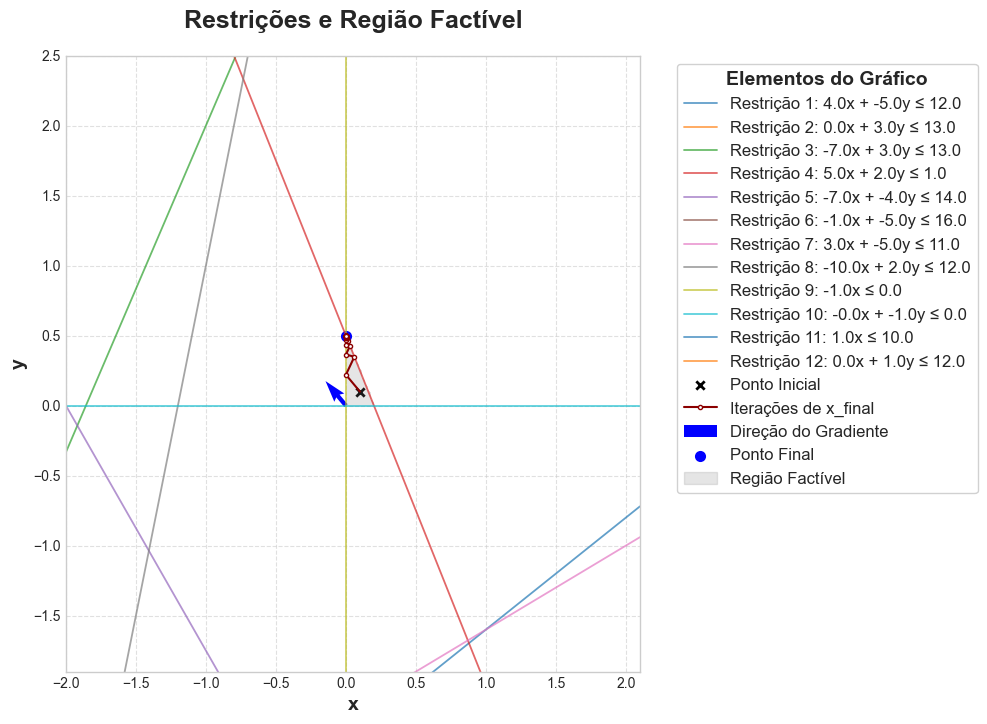

In [11]:
grafico1(historico_solucao,A,b,gradiente)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import linprog
from funcoes_auxiliares import *

def gradiente_descendente_circuncentrico2(x0, c, A,b, tol=1e-6, max_iter=1000):

    # Inicializa alguns parâmetros
    x = np.array(x0, dtype=float)
    n = len(c)
    m = len(b)
    grad = np.array(c)

    #Fatores que estou interessado em guardar 
    historico_solucao = [x.copy()]
    restricoes_ativas = []
    vetores_direcao = []
    lista_alphas = []
    tamanho_passo = []
    valores_funcao_objetivo = [np.dot(c, x)]


    for i in range(max_iter):
        
        i_ativos = check_active_constraints(x, A, b, tol)
        # Deixa os vetores das restrições unitários
        restricoes = A[i_ativos].astype(float)
        restricoes_ativas.append(restricoes)
    
        for i in range(len(restricoes)):
            restricoes[i] = restricoes[i] / np.linalg.norm(restricoes[i])

        grad_normalizado = grad / np.linalg.norm(grad)
        if len(restricoes) > 0:
            restricoes = np.vstack([restricoes, grad_normalizado])
        else:
            restricoes = np.array([grad_normalizado])
        direcao = circuncentro(-restricoes)

        # Verificar convergência
        if np.linalg.norm(direcao) < tol:
            break
        vetores_direcao.append(direcao)

        alphas = []

        # Para restrições Ax <= b
        for i in range(m):
            a_i = A[i]
            prod = np.dot(a_i, direcao)
            
            # Se a direção não viola a restrição, o passo pode ser infinito
            if prod <= 0:
                continue
            
            # Caso contrário, calculamos o máximo passo possível
            alpha = (b[i] - np.dot(a_i, x)) / prod
            alphas.append(alpha)


        # Se não houver restrições ativas na direção de descida
        if not alphas:
            print("Problema não limitado na direção de descida")
            break

        # O tamanho do passo é determinado pela restrição mais próxima
        alpha = min(alphas)
        lista_alphas.append(alpha)
        
        # Atualizar a solução
        x_old = x.copy()
        if i//2 != 0:
            p = 1
        else:
            p = 2
        x = x + alpha * direcao / p
        tamanho_passo.append(np.linalg.norm(x - x_old))
        historico_solucao.append(x.copy())
        
        # Calcular o valor da função objetivo
        f_val = np.dot(c, x)
        valores_funcao_objetivo.append(f_val)
        

        
    return historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao, lista_alphas,tamanho_passo, grad